<a href="https://colab.research.google.com/github/ahcamachod/1922-clustering-kmeans-dbscan-meanshift/blob/main/clustering_kmeans_dbscan_meanshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering: KMeans, DBSCAN y Mean Shift** 

En este notebook estaremos ejecutando diversos métodos para la clusterización de datos.

Utilizaremos una base de datos disponible en Kaggle llamada *Customer Personality Analysis*.

El dataset utilizado se puede acceder en el siguiente link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis 

## Aula 1

### 1.2 Importando los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv('marketing_campaign.csv', sep='\t')
datos.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
filas_1 = datos.shape[0]
print(f'El dataframe contiene {filas_1} filas')

El dataframe contiene 2240 filas


In [4]:
columnas_1 = datos.shape[1]
print(f'El dataframe contiene {columnas_1} columnas')

El dataframe contiene 29 columnas


In [5]:
columnas = {'Year_Birth':'Ano_Nacimiento', 'Education':'Escolaridad', 'Marital_Status':'Estado_Civil', 
            'Income':'Renta_Anual', 'Kidhome':'CtNinos','Teenhome':'CtAdolescentes', 'Dt_Customer':'Primera_Compra', 
            'Recency':'Recencia', 'MntWines':'GastoVinos', 'MntFruits':'GastoFrutas','MntMeatProducts':'GastoCarnes', 
            'MntFishProducts':'GastoPescado', 'MntSweetProducts':'GastoGolosinas','MntGoldProds':'GastoOro', 
            'NumDealsPurchases':'NumComprasConDescuento', 'NumWebPurchases':'NumComprasOnline',
            'NumCatalogPurchases':'NumComprasCatalogo', 'NumStorePurchases':'NumComprasTienda', 
            'NumWebVisitsMonth':'NumVisitasOnlineMes','Z_CostContact':'CostoContacto','Z_Revenue':'Ingresos','AcceptedCmp3':'AceptaCmp3', 'AcceptedCmp4':'AceptaCmp4', 
            'AcceptedCmp5':'AceptaCmp5', 'AcceptedCmp1':'AceptaCmp1', 'AcceptedCmp2':'AceptaCmp2', 
            'Complain':'Quejas','Response':'AceptaCmpActual'}

datos = datos.rename(columns=columnas)

In [6]:
datos

,ID,Ano_Nacimiento,Escolaridad,Estado_Civil,Renta_Anual,CtNinos,CtAdolescentes,Primera_Compra,Recencia,GastoVinos,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


**Clientes**

*ID*: Identificación única del cliente.

*Ano_Nacimiento*: Año de nacimiento del cliente.

*Escolaridad*: Nivel educativo del cliente.

*Estado_Civil*: Estado civil del cliente.

*Renta_Anual*: Renta anual del cliente.

*CtNinos*: Número de niños en el hogar.

*CtAdolescentes*: Número de adolescentes en el hogar.

*Primera_Compra*: Fecha en que compró por primera vez

*Recencia*: Hace cuántos días realizó la última compra.

*Quejas*: 1 si el cliente se quejó en los últimos 2 años, 0 en otro caso.

**Productos**

*GastoVinos*: Gasto en vinos en los últimos 2 años.

*GastoFrutas*: Gasto en frutas en los últimos 2 años.

*GastoCarnes*: Gasto en carne en los últimos 2 años.

*GastoPescado*: Gasto en pescado en los últimos 2 años.

*GastoGolosinas*: Gasto en golosinas en los últimos 2 años.

*GastoOro*: Gasto en productos de oro en los últimos 2 años.

**Promociones**

*NumComprasConDescuento*: Número de compras con descuento.

*AceptaCmp1*: 1 si el cliente aceptó la oferta en la primera campaña, 0 en otro caso.

*AceptaCmp2*: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en otro caso.

*AceptaCmp3*: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en otro caso.

*AceptaCmp4*: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en otro caso.

*AceptaCmp5*: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en otro caso.

*AceptaCmpActual*: 1 si el cliente aceptó la oferta en la última campaña, 0 en otro caso.

**Compras**

*NumComprasOnline*: Número de compras realizadas en la página web.

*NumComprasCatalogo*: Número de compras realizadas a través del catálogo.

*NumComprasTienda*: Número de compras realizadas en la tienda.

*NumVisitasOnlineMes*: Número de visitas realizadas a la página web.

### 1.3 Analizando y transformando los datos

In [7]:
datos.isna().sum()

ID                         0
Ano_Nacimiento             0
Escolaridad                0
Estado_Civil               0
Renta_Anual               24
CtNinos                    0
CtAdolescentes             0
Primera_Compra             0
Recencia                   0
GastoVinos                 0
GastoFrutas                0
GastoCarnes                0
GastoPescado               0
GastoGolosinas             0
GastoOro                   0
NumComprasConDescuento     0
NumComprasOnline           0
NumComprasCatalogo         0
NumComprasTienda           0
NumVisitasOnlineMes        0
AceptaCmp3                 0
AceptaCmp4                 0
AceptaCmp5                 0
AceptaCmp1                 0
AceptaCmp2                 0
Quejas                     0
CostoContacto              0
Ingresos                   0
AceptaCmpActual            0
dtype: int64

In [8]:
datos.dropna(axis=0, inplace=True)
datos.isna().sum()

ID                        0
Ano_Nacimiento            0
Escolaridad               0
Estado_Civil              0
Renta_Anual               0
CtNinos                   0
CtAdolescentes            0
Primera_Compra            0
Recencia                  0
GastoVinos                0
GastoFrutas               0
GastoCarnes               0
GastoPescado              0
GastoGolosinas            0
GastoOro                  0
NumComprasConDescuento    0
NumComprasOnline          0
NumComprasCatalogo        0
NumComprasTienda          0
NumVisitasOnlineMes       0
AceptaCmp3                0
AceptaCmp4                0
AceptaCmp5                0
AceptaCmp1                0
AceptaCmp2                0
Quejas                    0
CostoContacto             0
Ingresos                  0
AceptaCmpActual           0
dtype: int64

In [9]:
datos.sample()

,ID,Ano_Nacimiento,Escolaridad,Estado_Civil,Renta_Anual,CtNinos,CtAdolescentes,Primera_Compra,Recencia,GastoVinos,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
2013,1951,1981,Basic,Married,34445.0,0,0,27-01-2013,92,228,...,9,0,0,0,0,0,0,3,11,0


In [10]:
datos = datos.drop(columns=['Escolaridad','Estado_Civil','Primera_Compra'], axis=1)

In [11]:
datos

,ID,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,3,11,0


In [12]:
matriz_corr = datos.corr()
matriz_corr

,ID,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491
Ano_Nacimiento,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692
Renta_Anual,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
CtNinos,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909
CtAdolescentes,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901
Recencia,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766
GastoVinos,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299
GastoFrutas,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443
GastoCarnes,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746
GastoPescado,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145


In [13]:
datos.isnull().sum()

ID                        0
Ano_Nacimiento            0
Renta_Anual               0
CtNinos                   0
CtAdolescentes            0
Recencia                  0
GastoVinos                0
GastoFrutas               0
GastoCarnes               0
GastoPescado              0
GastoGolosinas            0
GastoOro                  0
NumComprasConDescuento    0
NumComprasOnline          0
NumComprasCatalogo        0
NumComprasTienda          0
NumVisitasOnlineMes       0
AceptaCmp3                0
AceptaCmp4                0
AceptaCmp5                0
AceptaCmp1                0
AceptaCmp2                0
Quejas                    0
CostoContacto             0
Ingresos                  0
AceptaCmpActual           0
dtype: int64

In [14]:
matriz_corr = datos.corr()
matriz_corr

,ID,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491
Ano_Nacimiento,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692
Renta_Anual,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
CtNinos,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909
CtAdolescentes,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901
Recencia,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766
GastoVinos,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299
GastoFrutas,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443
GastoCarnes,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746
GastoPescado,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145


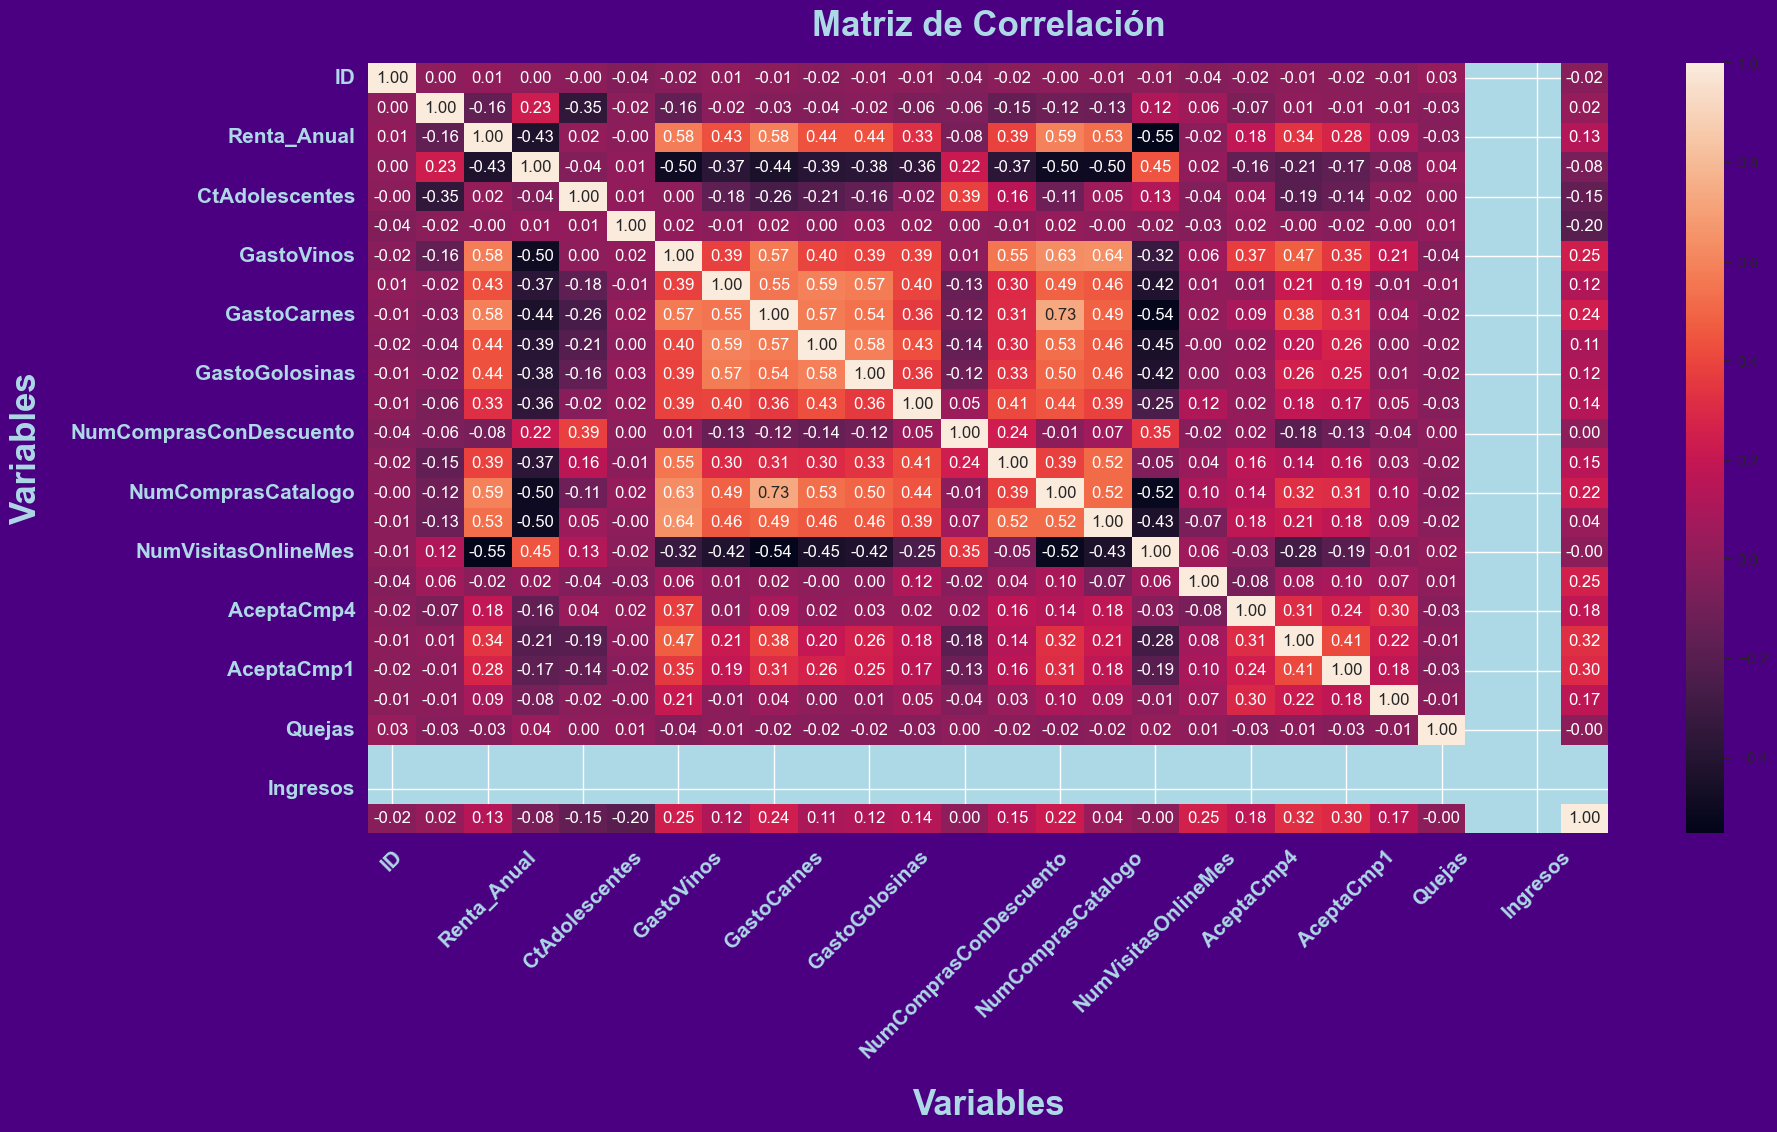

In [15]:
def grafico_correlacion():
    sns.set_theme(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.heatmap(matriz_corr, annot=True,fmt='.2f');
    ax.figure.set_size_inches(20,10)
    ax.set_title('Matriz de Correlación', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('Variables', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('Variables',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold', rotation=45)
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.show()
grafico_correlacion()

In [16]:
datos['ID'].value_counts()

ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: count, Length: 2216, dtype: int64

### 1.4 Selección de atributos 

In [17]:
datos.columns

Index(['ID', 'Ano_Nacimiento', 'Renta_Anual', 'CtNinos', 'CtAdolescentes',
       'Recencia', 'GastoVinos', 'GastoFrutas', 'GastoCarnes', 'GastoPescado',
       'GastoGolosinas', 'GastoOro', 'NumComprasConDescuento',
       'NumComprasOnline', 'NumComprasCatalogo', 'NumComprasTienda',
       'NumVisitasOnlineMes', 'AceptaCmp3', 'AceptaCmp4', 'AceptaCmp5',
       'AceptaCmp1', 'AceptaCmp2', 'Quejas', 'CostoContacto', 'Ingresos',
       'AceptaCmpActual'],
      dtype='object')

In [18]:
X = datos.drop(columns=['ID','CostoContacto','Ingresos','Quejas'], axis=1)
X

,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasOnline,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual
0,1957,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,9,3,4,5,0,0,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,8,2,5,7,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,2,3,13,6,0,1,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,6,5,10,3,0,0,0,0,0,0


In [19]:
from datetime import datetime

ano_actual = datetime.today().year
X['Edad'] = ano_actual -  datos['Ano_Nacimiento']
X.head()

,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,1,67
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,70
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,59
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,40
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,43


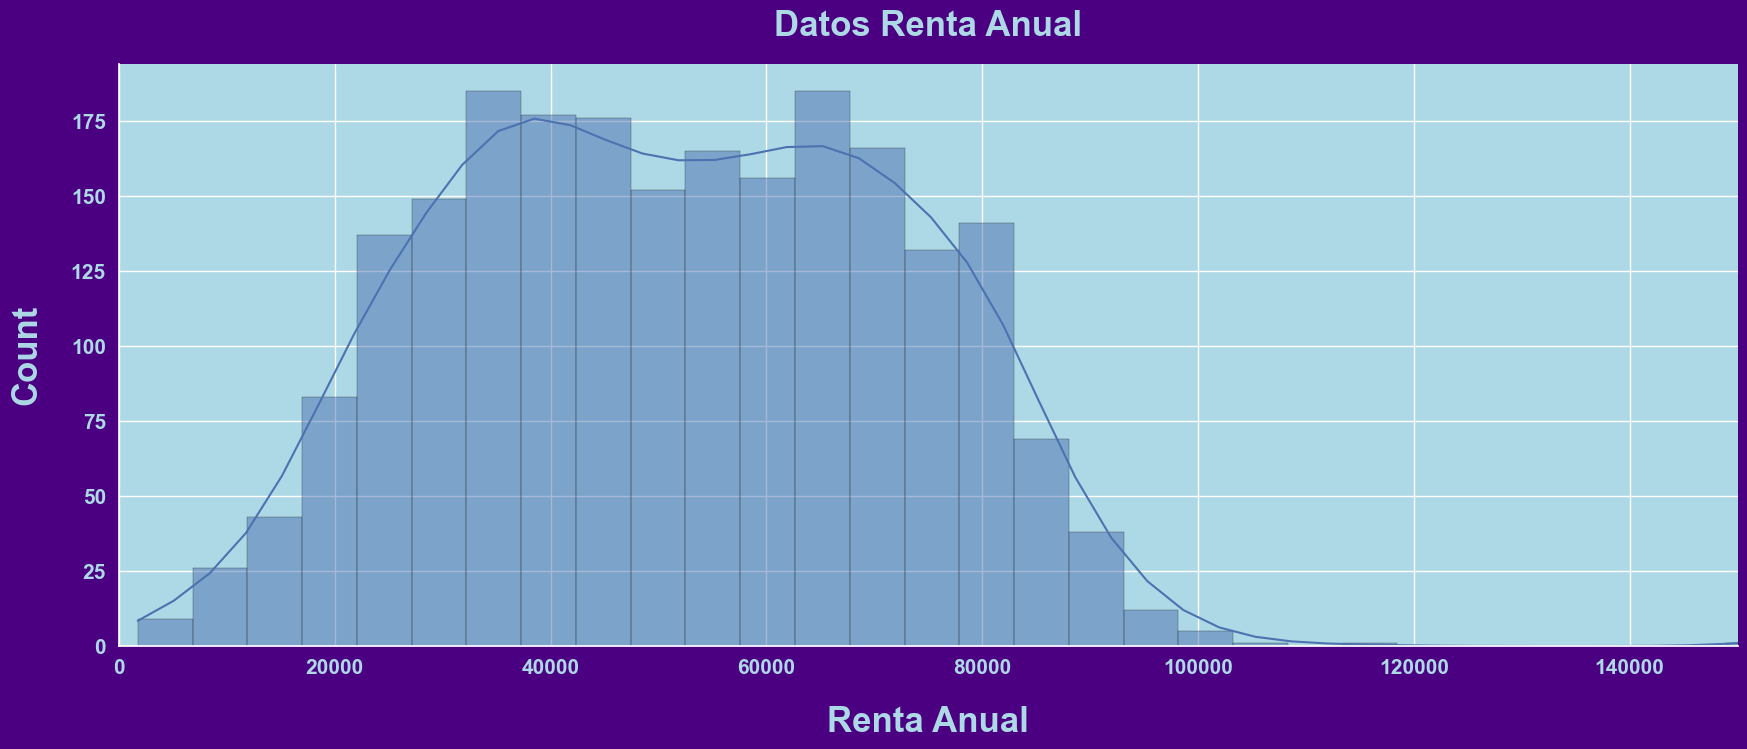

In [20]:
def grafico():
    sns.set_theme(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.displot(datos['Renta_Anual'], edgecolor='k', kde=True);
    ax.figure.set_size_inches(20,7)
    plt.xlim(0, 150000)
    plt.title('Datos Renta Anual', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabels('Renta Anual', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabels('Count',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(tarjetas)
    plt.show()
grafico()

### 1.5 Normalización

In [21]:
X.describe()

,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,55.179603
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,11.985554
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000


In [22]:
X.drop(columns=['Ano_Nacimiento'], axis=1, inplace=True)
X.sample()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
2163,74859.0,0,0,63,570,73,614,133,102,73,...,5,11,3,0,0,0,1,0,0,75


In [23]:
atributos = X.columns

X_norm = X.copy()

for atributo in atributos:
    X_norm[atributo] = (X[atributo]-min(X[atributo])) / (max(X[atributo])-min(X[atributo]))
    
X_norm.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


## Aula 2 

### 2.2 KMeans

In [25]:
from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters=3,)
agrupador.fit(X_norm)

KMeans(n_clusters=3)

In [26]:
agrupador.labels_

array([0, 1, 2, ..., 2, 2, 0])

In [27]:
datos['Cluster_Kmeans'] = agrupador.labels_
datos.Cluster_Kmeans.value_counts()

Cluster_Kmeans
1    1085
2     798
0     333
Name: count, dtype: int64

In [28]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
datos['Cluster_Kmeans'] = agrupador.labels_
datos.Cluster_Kmeans.value_counts()

Cluster_Kmeans
3    849
1    594
0    439
2    334
Name: count, dtype: int64

### 2.3 Gráficando los clusters en 2D

In [29]:
import plotly.graph_objects as go

In [30]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
labels = agrupador.labels_

figura = go.Figure()
figura.add_trace(go.Scatter(x=datos['Renta_Anual'],
                            y=datos['GastoVinos'],
                            mode='markers',
                            marker=dict(color=labels.astype(np.float_)),
                            text=labels 
                            ))

figura.update_layout(
    margin=dict(l=20, r=20, t=50, b=50),
    paper_bgcolor="indigo",
    font=dict(
        size=15,
        color="white"
        )
)
figura.show()

In [31]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
labels = agrupador.labels_

figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X['Edad'],
                            mode='markers',
                            marker=dict(color=labels.astype(np.float_)),
                            text=labels 
                            ))
figura.update_layout(
    scene=dict(xaxis_title='Renta Anual',
               yaxis_title='Gasto en Vinos',
               zaxis_title='Edad del cliente'),
    margin=dict(l=20, r=20, t=50, b=50),
    paper_bgcolor="indigo",
    font=dict(
        size=15,
        color="white"
        )
)
figura.show()

In [32]:

centroides = pd.DataFrame(agrupador.cluster_centers_, columns=X.columns)

centroides.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.072628,0.246637,0.199552,0.327264,0.220455,0.144039,0.117229,0.144398,0.106014,0.158865,...,0.113709,0.398758,0.313677,0.255605,0.058296,-5.551115e-17,0.035874,0.013453,1.000000e+00,0.263311
1,0.054441,0.385565,0.256885,0.512226,0.044043,0.027998,0.020067,0.030914,0.021955,0.057631,...,0.026218,0.267660,0.319136,0.047483,0.010446,4.163336e-17,0.002849,0.001899,-3.330669e-16,0.243935
2,0.097541,0.031407,0.294598,0.526560,0.342276,0.241004,0.161462,0.266851,0.185982,0.216730,...,0.159727,0.664283,0.200879,0.038945,0.087940,4.899497e-02,0.054020,0.006281,-3.053113e-16,0.293055
3,0.119385,0.024306,0.072917,0.455527,0.589199,0.278127,0.268981,0.311535,0.234786,0.242233,...,0.217262,0.620192,0.162847,0.173611,0.486111,8.541667e-01,0.611111,0.138889,7.638889e-01,0.249326


In [33]:
inverso = scaler.inverse_transform(centroides)
centros = pd.DataFrame(inverso, columns=X.columns)
centros.head()


,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,50022.798206,0.493274,0.399103,32.399103,329.139013,28.663677,202.219731,37.399103,27.775785,50.995516,...,3.183857,5.183857,6.273543,0.255605,0.058296,-5.551115e-17,0.035874,0.013453,1.000000e+00,55.121076
1,37929.837607,0.771130,0.513770,50.710351,65.756885,5.571700,34.615385,8.006648,5.752137,18.499525,...,0.734093,3.479582,6.382716,0.047483,0.010446,4.163336e-17,0.002849,0.001899,-3.330669e-16,53.125356
2,66588.457286,0.062814,0.589196,52.129397,511.017588,47.959799,278.521357,69.114322,48.727387,69.570352,...,4.472362,8.635678,4.017588,0.038945,0.087940,4.899497e-02,0.054020,0.006281,-3.053113e-16,58.184673
3,81113.152778,0.048611,0.145833,45.097222,879.673611,55.347222,463.993056,80.687500,61.513889,77.756944,...,6.083333,8.062500,3.256944,0.173611,0.486111,8.541667e-01,0.611111,0.138889,7.638889e-01,53.680556


In [34]:
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=centros['Renta_Anual'],
                              y=centros['GastoVinos'],
                              z=centros['Edad'],
                              mode='markers',
                              marker=dict(color='red'),
                              text=[0,1,2,3]))
figura.update_layout(
    scene=dict(xaxis_title='Renta Anual',
               yaxis_title='Gasto en Vinos',
               zaxis_title='Edad del cliente'),
    margin=dict(l=20, r=20, t=50, b=50),
    paper_bgcolor="indigo",
    font=dict(
        size=15,
        color="white"
        )
)
figura.show()

### 2.4 Gráficando los clusters en 3D

### 2.5 Visualizando los centroides

## Aula 3

### 3.2 DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

agrupador = DBSCAN(eps=0.1, min_samples=200,metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

Cluster_DBSCAN
-1    2216
Name: count, dtype: int64

In [36]:
agrupador = DBSCAN(eps=2.1, min_samples=200,metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

Cluster_DBSCAN
0    2216
Name: count, dtype: int64

In [37]:
agrupador = DBSCAN(eps=1.1, min_samples=200,metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

Cluster_DBSCAN
 0    1961
-1     255
Name: count, dtype: int64

### 3.3 Ajuste de hiperparámetros y visualización

In [38]:
rango = [i for i in np.arange(0.1,1.5,0.05)]
rango

[0.1,
 0.15000000000000002,
 0.20000000000000004,
 0.25000000000000006,
 0.30000000000000004,
 0.3500000000000001,
 0.40000000000000013,
 0.45000000000000007,
 0.5000000000000001,
 0.5500000000000002,
 0.6000000000000002,
 0.6500000000000001,
 0.7000000000000002,
 0.7500000000000002,
 0.8000000000000002,
 0.8500000000000002,
 0.9000000000000002,
 0.9500000000000003,
 1.0000000000000004,
 1.0500000000000003,
 1.1000000000000005,
 1.1500000000000004,
 1.2000000000000004,
 1.2500000000000004,
 1.3000000000000005,
 1.3500000000000005,
 1.4000000000000006,
 1.4500000000000006]

In [39]:
for e in rango:
    agrupador = DBSCAN(eps=e, min_samples=200,metric='euclidean')
    agrupador.fit(X_norm)
    datos['Cluster_DBSCAN'] = agrupador.labels_
    print(f'El epsilon es: {e} y hay {len(datos.Cluster_DBSCAN.value_counts())} clusters')
    

El epsilon es: 0.1 y hay 1 clusters
El epsilon es: 0.15000000000000002 y hay 1 clusters
El epsilon es: 0.20000000000000004 y hay 1 clusters
El epsilon es: 0.25000000000000006 y hay 1 clusters
El epsilon es: 0.30000000000000004 y hay 1 clusters
El epsilon es: 0.3500000000000001 y hay 2 clusters
El epsilon es: 0.40000000000000013 y hay 2 clusters
El epsilon es: 0.45000000000000007 y hay 3 clusters
El epsilon es: 0.5000000000000001 y hay 3 clusters
El epsilon es: 0.5500000000000002 y hay 2 clusters
El epsilon es: 0.6000000000000002 y hay 2 clusters
El epsilon es: 0.6500000000000001 y hay 2 clusters
El epsilon es: 0.7000000000000002 y hay 2 clusters
El epsilon es: 0.7500000000000002 y hay 2 clusters
El epsilon es: 0.8000000000000002 y hay 2 clusters
El epsilon es: 0.8500000000000002 y hay 2 clusters
El epsilon es: 0.9000000000000002 y hay 2 clusters
El epsilon es: 0.9500000000000003 y hay 2 clusters
El epsilon es: 1.0000000000000004 y hay 2 clusters
El epsilon es: 1.0500000000000003 y hay 

In [40]:
rango = [i for i in np.arange(0.4,1.6,0.005)]
for e in rango:
    agrupador = DBSCAN(eps=e, min_samples=200,metric='euclidean')
    agrupador.fit(X_norm)
    datos['Cluster_DBSCAN'] = agrupador.labels_
    print(f'El epsilon es: {e} y hay {len(datos.Cluster_DBSCAN.value_counts())} clusters')

El epsilon es: 0.4 y hay 2 clusters
El epsilon es: 0.405 y hay 2 clusters
El epsilon es: 0.41000000000000003 y hay 2 clusters
El epsilon es: 0.41500000000000004 y hay 2 clusters
El epsilon es: 0.42000000000000004 y hay 2 clusters
El epsilon es: 0.42500000000000004 y hay 2 clusters
El epsilon es: 0.43000000000000005 y hay 2 clusters
El epsilon es: 0.43500000000000005 y hay 3 clusters
El epsilon es: 0.44000000000000006 y hay 3 clusters
El epsilon es: 0.44500000000000006 y hay 3 clusters
El epsilon es: 0.45000000000000007 y hay 3 clusters
El epsilon es: 0.45500000000000007 y hay 3 clusters
El epsilon es: 0.4600000000000001 y hay 3 clusters
El epsilon es: 0.4650000000000001 y hay 3 clusters
El epsilon es: 0.4700000000000001 y hay 3 clusters
El epsilon es: 0.4750000000000001 y hay 3 clusters
El epsilon es: 0.4800000000000001 y hay 3 clusters
El epsilon es: 0.4850000000000001 y hay 3 clusters
El epsilon es: 0.4900000000000001 y hay 3 clusters
El epsilon es: 0.4950000000000001 y hay 3 cluster

In [41]:
agrupador = DBSCAN(eps=0.435, min_samples=200,metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

Cluster_DBSCAN
-1    1647
 0     367
 1     202
Name: count, dtype: int64

In [42]:
agrupador = DBSCAN(eps=0.5, min_samples=200,metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

Cluster_DBSCAN
-1    1569
 0     377
 1     270
Name: count, dtype: int64

In [43]:
agrupador = DBSCAN(eps=0.5, min_samples=200,metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN'] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

Cluster_DBSCAN
-1    1569
 0     377
 1     270
Name: count, dtype: int64

## Aula 4

### 4.2 Mean Shift

In [44]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [45]:
bw = estimate_bandwidth(X_norm, quantile=0.1)

agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_norm)
datos['Cluster_MeanShift'] = agrupador.labels_
datos.Cluster_MeanShift.value_counts()

Cluster_MeanShift
0     1556
1      141
2       71
3       67
4       54
      ... 
49       1
53       1
65       1
56       1
35       1
Name: count, Length: 70, dtype: int64

In [46]:
cuantil = [c for c in np.arange(0.05,0.5,0.05)]

for c in cuantil:
    bw = estimate_bandwidth(X_norm, quantile=c)
    agrupador = MeanShift(bandwidth=bw)
    agrupador.fit(X_norm)
    datos['Cluster_MeanShift'] = agrupador.labels_
    print(f'El cauntil es: {c} y hay {len(datos.Cluster_MeanShift.value_counts())} clusters')

El cauntil es: 0.05 y hay 109 clusters
El cauntil es: 0.1 y hay 70 clusters
El cauntil es: 0.15000000000000002 y hay 59 clusters
El cauntil es: 0.2 y hay 52 clusters
El cauntil es: 0.25 y hay 37 clusters
El cauntil es: 0.3 y hay 26 clusters
El cauntil es: 0.35000000000000003 y hay 16 clusters
El cauntil es: 0.4 y hay 9 clusters
El cauntil es: 0.45 y hay 4 clusters


In [47]:
bw = estimate_bandwidth(X_norm, quantile=0.4)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_norm)
datos['Cluster_MeanShift'] = agrupador.labels_
datos.Cluster_MeanShift.value_counts()

Cluster_MeanShift
0    2003
1     134
3      23
4      21
5      17
7       9
2       4
6       3
8       2
Name: count, dtype: int64

### 4.3 Visualización de clusters

In [48]:
bw = estimate_bandwidth(X_norm, quantile=0.25)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_norm)
datos['Cluster_MeanShift'] = agrupador.labels_

In [49]:
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X['Edad'],
                            mode='markers',
                            marker=dict(color=labels.astype(np.float_)),
                            text=labels 
                            ))
figura.update_layout(
    scene=dict(xaxis_title='Renta Anual',
               yaxis_title='Gasto en Vinos',
               zaxis_title='Edad del cliente'),
    margin=dict(l=20, r=20, t=50, b=50),
    paper_bgcolor="indigo",
    font=dict(
        size=15,
        color="white"
        )
)
figura.show()

In [50]:
datos.Cluster_MeanShift.value_counts()

Cluster_MeanShift
0     1676
1      192
3       47
2       47
14      28
7       27
4       27
8       26
5       24
16      18
10      15
6       15
9       11
20       7
13       7
12       6
11       6
17       5
15       4
27       4
18       3
26       3
21       2
19       2
36       2
32       1
24       1
31       1
22       1
30       1
35       1
29       1
34       1
33       1
25       1
23       1
28       1
Name: count, dtype: int64

## Aula 5

### 5.1 Métrica para validación

In [51]:
agrupador = KMeans(n_clusters=5, random_state=42)
agrupador.fit(X_norm)
datos['Cluster_KMeans'] = agrupador.labels_
datos.Cluster_KMeans.value_counts()

Cluster_KMeans
3    681
1    672
0    534
4    208
2    121
Name: count, dtype: int64

In [52]:
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X['Edad'],
                            mode='markers',
                            marker=dict(color=labels.astype(np.float_)),
                            text=labels 
                            ))
figura.show()

### 5.3 Coeficiente de Silhouette para KMeans

In [53]:
from sklearn.metrics import silhouette_score

rango = [c for c in range(2,21)]
sil_kmeans = []
for i in rango:
    agrupador = KMeans(n_clusters=i)
    labels = agrupador.fit_predict(X_norm)
    valores = silhouette_score(X_norm, labels)
    sil_kmeans.append(valores)
    
sil_kmeans  

[0.34992641093370974,
 0.2155390329345082,
 0.10851356338402587,
 0.15426245252240195,
 0.23008547982873084,
 0.1652651198730708,
 0.1661690832267036,
 0.174969745247867,
 0.1680147717150796,
 0.1556646619945483,
 0.17032161861472778,
 0.1717279338683166,
 0.18357813136695744,
 0.19582932973154923,
 0.20681957231772172,
 0.1866660888806155,
 0.19980028798518007,
 0.20780707876324322,
 0.20924012530764077]

In [54]:
figura = go.Figure()
figura.add_trace(go.Scatter(x=rango,
                            y=sil_kmeans,
                            )).update_layout(title='Coeficientes de Silhouette para KMeans ',
                            xaxis_title='Número de clusters',
                            yaxis_title='Valor de Silhouette'
                                             )
figura.show()

In [55]:
figura = go.Figure()
figura.add_trace(go.Bar(x=rango,
                            y=sil_kmeans,
                            )).update_layout(title='Coeficientes de Silhouette para KMeans ',
                            xaxis_title='Número de clusters',
                            yaxis_title='Valor de Silhouette'
                                             )
figura.show()

In [56]:
figura = go.Figure()
figura.add_trace(go.Histogram(x=rango,
                            y=sil_kmeans,
                            )).update_layout(title='Coeficientes de Silhouette para KMeans ',
                            xaxis_title='Número de clusters',
                            yaxis_title='Valor de Silhouette'
                                             )
figura.show()

In [57]:
figura = go.Figure()
figura.add_trace(go.Waterfall(x=rango,
                            y=sil_kmeans,
                            )).update_layout(title='Coeficientes de Silhouette para KMeans ',
                            xaxis_title='Número de clusters',
                            yaxis_title='Valor de Silhouette'
                                             )
figura.show()

### 5.4 Coeficiente de Silhouette para DBSCAN

In [58]:
rango = [e for e in np.arange(0.35,2.35, 0.005)]
sil_dbscan = []
epsilon = []
for i in rango:
    agrupador = DBSCAN(eps=i, min_samples=200,metric='euclidean')
    labels = agrupador.fit_predict(X_norm)
    if len(np.unique(labels))>1:
        valores = silhouette_score(X_norm, labels)
        sil_dbscan.append(valores)
        epsilon.append(i)
    
print(sil_dbscan)  
print(epsilon)

[-0.019975153026844925, -0.01884897854084331, -0.01778602921380003, -0.016588699600076286, -0.015944494256186024, -0.0156406208378353, -0.0156406208378353, -0.014907645055591561, -0.014201641643739974, -0.012845752771855396, -0.012640737703385863, -0.012024023936882582, -0.012024023936882582, -0.011807443399411982, -0.011422183433199675, -0.011198505126959525, -0.011198505126959525, -0.04009607764320003, -0.03516040083954408, -0.02921455133583389, -0.02698066921441075, -0.02337799951600414, -0.02095899854442315, -0.020575153872265113, -0.020372760245353214, -0.017295021898023503, -0.017295021898023503, -0.017114535826631444, -0.017114535826631444, -0.016804887343470427, -0.01615168995588967, 0.07362776680113325, 0.08650594613110188, 0.09802440760456556, 0.10810053848850537, 0.11375608258085135, 0.12308346517298906, 0.16084065734987646, 0.16774939616004186, 0.17662191408337186, 0.17894688345877993, 0.19483500165924889, 0.19860797890790127, 0.20137285230309476, 0.20252560227368574, 0.203

In [59]:
figura = go.Figure()
figura.add_trace(go.Scatter(x=epsilon,
                            y=sil_dbscan,
                            )).update_layout(title='Coeficientes de Silhouette para DBSCAN ',
                            xaxis_title='Valor de epsilon',
                            yaxis_title='Valor de Silhouette'
                                             )
figura.show()

### 5.5 Coeficiente de Silhouette para Mean Shift

In [60]:
cuantil = [c for c in np.arange(0.025,0.525,0.025)]
sil_ms = []

for c in cuantil:
    bw = estimate_bandwidth(X_norm, quantile=c)
    agrupador = MeanShift(bandwidth=bw)
    labels = agrupador.fit_predict(X_norm)
    if len(np.unique(labels))>1:
        valores = silhouette_score(X_norm, labels)
        sil_ms.append(valores)


In [61]:
figura = go.Figure()
figura.add_trace(go.Scatter(x=cuantil,
                            y=sil_ms,
                            )).update_layout(title='Coeficientes de Silhouette para MeanShift ',
                            xaxis_title='Valor de cuantil',
                            yaxis_title='Valor de Silhouette'
                                             )
figura.show()

### 5.6 Mejores configuraciones para la clusterización

In [62]:
agrupador = KMeans(n_clusters=2)
agrupador.fit(X_norm)
datos['Cluster_KMeans']=agrupador.labels_
datos.Cluster_KMeans.value_counts()

Cluster_KMeans
0    1873
1     343
Name: count, dtype: int64

In [63]:
agrupador = DBSCAN(eps=1.68,min_samples=200,metric='euclidean')
agrupador.fit(X_norm)
datos['Cluster_DBSCAN']=agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

Cluster_DBSCAN
 0    2215
-1       1
Name: count, dtype: int64

In [65]:
bw = estimate_bandwidth(X_norm, quantile=0.5)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_norm)
datos['Cluster_MeanShift']=agrupador.labels_
datos.Cluster_MeanShift.value_counts()

Cluster_MeanShift
0    1998
1     210
2       4
3       4
Name: count, dtype: int64